## Introduction to visualizing data in the eeghdf files

### Getting started
The EEG is stored in hierachical data format (HDF5). This format is widely used, open, and supported in many languages, e.g., matlab, R, python, C, etc.

Here, I will use the h5py library in python

In [1]:
# import libraries
from __future__ import print_function, division, unicode_literals
%matplotlib inline
# %matplotlib notebook # allows interactions

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
from pprint import pprint

import stacklineplot # local copy

In [2]:
# Make all the figures bigger and easier to see in this notebook
# matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
FIGSIZE = (12.0,8.0) # use with %matplotlib inline
matplotlib.rcParams['figure.figsize'] = FIGSIZE

### Direct access via h5py library
We have written a helper library eeghdf to conveniently access these hdf5 files, but you do not need to rely upon it. You can access all the data via hdf5 libraries. Below, we show how this is done via the popular h5py library in python.

The hdf5 data is stored hierachically in a file as a tree of keys and values, similar to how files are stored in a file system.

It is possible to inspect the file using standard hdf5 tools.
Below we show the keys and values associated with the root of the tree. This shows that there is a "patient" group and a group "record-0"

In [3]:
# first open the hdf5 file
hdf = h5py.File('../data/absence_epilepsy.eeghdf','r')

# show the groups at the root of the tree as a list
list(hdf.items())

[('patient', <HDF5 group "/patient" (0 members)>),
 ('record-0', <HDF5 group "/record-0" (10 members)>)]

We can focus on the patient group and access it via hdf['patient'] as if it was a python dictionary. Here are the key,value pairs in that group. Note that the patient information has been anonymized. Everyone is given the same set of birthdays. This shows that this file is for Subject 2619, who is male.

In [4]:
list(hdf['patient'].attrs.items())

[('patient_name', '2619, Subject'),
 ('patientcode', '3fe61c07d97e5b5595d647f9c1dc469e'),
 ('gender', 'Male'),
 ('birthdate', '1990-01-01'),
 ('patient_additional', ''),
 ('gestatational_age_at_birth_days', -1.0),
 ('born_premature', 'unknown')]

Now we look at how the waveform data is stored. By convention, the first record is called "record-0" and it contains the waveform data as well as the approximate time (relative to the birthdate)at which the study was done, as well as technical information like the number of channels, electrode names and sample rate.

In [5]:
rec = hdf['record-0']
list(rec.attrs.items())

[('start_isodatetime', '2000-01-17 08:56:46'),
 ('end_isodatetime', '2000-01-17 09:26:57'),
 ('number_channels', 36),
 ('number_samples_per_channel', 362200),
 ('sample_frequency', 200.00000000000003),
 ('bits_per_sample', 16),
 ('technician', ''),
 ('patient_age_days', 3668.3727546296295)]

### Arrays of data
Arrays of data are stored in "datasets" which have an interface similar to that of numpy arrays

In [6]:
# here is the list of data arrays stored in the record
list(rec.items())

[('edf_annotations', <HDF5 group "/record-0/edf_annotations" (3 members)>),
 ('physical_dimensions',
  <HDF5 dataset "physical_dimensions": shape (36,), type "|O">),
 ('prefilters', <HDF5 dataset "prefilters": shape (36,), type "|O">),
 ('signal_digital_maxs',
  <HDF5 dataset "signal_digital_maxs": shape (36,), type "<i4">),
 ('signal_digital_mins',
  <HDF5 dataset "signal_digital_mins": shape (36,), type "<i4">),
 ('signal_labels', <HDF5 dataset "signal_labels": shape (36,), type "|O">),
 ('signal_physical_maxs',
  <HDF5 dataset "signal_physical_maxs": shape (36,), type "<f8">),
 ('signal_physical_mins',
  <HDF5 dataset "signal_physical_mins": shape (36,), type "<f8">),
 ('signals', <HDF5 dataset "signals": shape (36, 362200), type "<i2">),
 ('transducers', <HDF5 dataset "transducers": shape (36,), type "|O">)]

In [7]:
rec['physical_dimensions'][:]

array([b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV',
       b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV',
       b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'uV',
       b'uV', b'uV', b'uV', b'uV', b'uV', b'uV', b'mV', b'mV', b''], dtype=object)

In [8]:
rec['prefilters'][:]

array([b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b''], dtype=object)

In [9]:
rec['signal_digital_maxs'][:]

array([32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767,
       32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767,
       32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767,
       32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767, 32767], dtype=int32)

In [10]:
rec['signal_digital_mins'][:]

array([-32768, -32768, -32768, -32768, -32768, -32768, -32768, -32768,
       -32768, -32768, -32768, -32768, -32768, -32768, -32768, -32768,
       -32768, -32768, -32768, -32768, -32768, -32768, -32768, -32768,
       -32768, -32768, -32768, -32768, -32768, -32768, -32768, -32768,
       -32768, -32768, -32768, -32768], dtype=int32)

In [11]:
rec['signal_physical_maxs'][:]

array([  3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         3.19990200e+03,   3.19990200e+03,   3.19990200e+03,
         1.20025600e+04,   1.20025600e+04,   1.00000000e+00])

We can also grab the actual waveform data and visualize it. Using the helper library for matplotlib stackplot.py. 


[More work is being done in the eegml-eegvis package for more sophisticated visualization.]

In [12]:
signals = rec['signals'] # signals raw sample data (signed integers)
labels = rec['signal_labels']
electrode_labels = [str(s,'ascii') for s in labels]
numbered_electrode_labels = ["%d:%s" % (ii, str(labels[ii], 'ascii')) for ii in range(len(labels))]

#### Simple visualization of EEG (brief absence seizure)

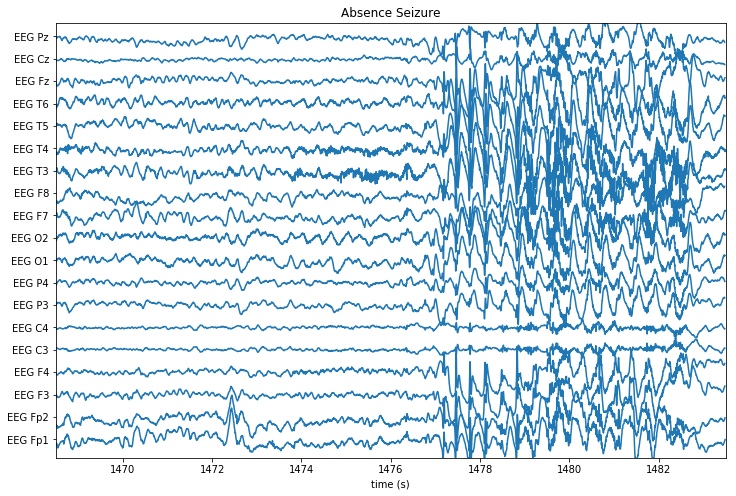

In [13]:
# choose a point in the waveform to show a seizure
stacklineplot.show_epoch_centered(signals, 1476,epoch_width_sec=15,chstart=0, chstop=19, fs=rec.attrs['sample_frequency'], ylabels=electrode_labels, yscale=3.0)
plt.title('Absence Seizure');

### Annotations
It was not a coincidence that I chose this time in the record. I used the annotations to focus on portion of the record which was marked as having a seizure.

You can access the clinical annotations via rec['edf_annotations']

In [14]:
annot = rec['edf_annotations']

In [15]:
antext = [s.decode('utf-8') for s in annot['texts'][:]]
starts100ns = [xx for xx in annot['starts_100ns'][:]]  # process the bytes into text and lists of start times

In [16]:
# Use pandas dataframe to allow for pretty display in the jupyter notebook
df = pd.DataFrame(data=antext, columns=['text'])  # load into a pandas data frame
df['starts100ns'] = starts100ns
df['starts_sec'] = df['starts100ns']/10**7
del df['starts100ns']

It is easy then to find the annotations related to seizures

In [17]:
df[df.text.str.contains('sz',case=False)]

,text,starts_sec
86,SZ START,1380.512
88,SZ END,1384.246
91,SZ START,1416.897
93,SZ END,1422.843
99,SZ START,1476.933
103,SZ END,1483.269


In [21]:
print('matplotlib.__version__:', matplotlib.__version__)
print('h5py.__version__', h5py.__version__)
print('pandas.__version__:', pd.__version__)

matplotlib.__version__: 2.1.2
h5py.__version__ 2.7.0
pandas.__version__: 0.20.3
